In [1]:
from typing import List, Dict

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import *
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.analytics_utils import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools


In [2]:
filesuffixes = [
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_cols_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    ]

In [3]:
filesuffixes = [
    '_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_cols_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_all_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_3_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_5_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_10_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_not_screened_cols_single_label_first_5_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_participants_all_RandomForestClassifier_ovar_cancer__15_trials',
    # TODO: either don't use these or make them single label
    # '_for_experiment_participants_screened_first_5_ca125_and_binary_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_ca125_binary_RandomForestClassifier_cancer_in_next_1_years__15_trials',,
    '_for_experiment_participants_screened_single_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials'
]

In [4]:
cv_analytics_utils = commonized_datasets(filesuffixes)

_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_not_screened_cols_single_label_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 230
_for_experiment_participants_screened_cols_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 1084
_for_experiment_part

In [5]:
def find_non_intersection(list_of_arrays):
    if not list_of_arrays:
        return None

    # Start with the first array as the initial set of non-intersecting values
    non_intersection = set(list_of_arrays[0])

    # Iterate through the remaining arrays and find values that do not intersect
    for arr in list_of_arrays[1:]:
        non_intersection = non_intersection.symmetric_difference(arr)

    # Convert the result back to a list
    non_intersection = list(non_intersection)

    return non_intersection


X-axis -1 means that somewhere withing the next year person gets cancer. -2 means somewhere between year -1 and 0 person gets cancer.

While for patients who developed cancer, we alligned them by the year when they got cancer. So, what I did is that I looked at the people who got cancer within the first 5 years of the experiment and who got cancer within that period. I aligned them on the year they got cancer and calculated the average estimated probability of them getting cancer as predicted by model 1 year before actually getting cancer, 2 years before actually getting cancer and so on. This is what the result I got based on the dataset with questionnaire and screening data:

There is an interesting correlation, and we can see that the increase in the probability is non-linear. (I also included the standard deviation interval). On the other hand, the graph based on the same selection of individuals, but only using the questionnaire data, did not exhibit such characteristics:

For the individuals who did not develop cancer, they were alligned by the date of their last exam. Just to verify if there is no fluke, I tested this also on a general population and there is no correlation (they are just aligned based on the last observation)

In [6]:


def display_graph_interval(self) -> VisualizationUtil:
    f, ax = plt.subplots(1, 3, figsize=(16, 5))
    plt.yticks(rotation=0)
    visualization_util = VisualizationUtil()
    # Getting AUC
    y_test_all, y_pred_all, y_prob_all = self.combined_predictions()
    fpr, tpr, thresholds = roc_curve(y_test_all, y_prob_all)
    roc_auc = auc(fpr, tpr)
    
    visualization_util.display_confusion_matrix(ax[0], self.get_confusion_matrix())
    visualization_util.display_roc_graph(ax[-2], *self.roc_with_interval(), color='#b50000', roc_auc=roc_auc)
    # visualization_util.display_roc_threshold(ax[-2], *self.roc_with_interval())
    precision, recall, thresholds = self.precision_recall()
    visualization_util.display_precision_recall(ax[-1], precision, recall)
    plt.show()
    return visualization_util

In [7]:
filesuffixes_display = [
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials'
]



Cross-Validation measures:
+--------------------+----------+-------------+----------+----------+
|                    |     mean |         std |      min |      max |
|--------------------+----------+-------------+----------+----------|
| precision__class_0 | 0.99941  | 0.000103283 | 0.999201 | 0.999606 |
| recall__class_0    | 0.999788 | 0.000176068 | 0.999304 | 1        |
| f1-score__class_0  | 0.999599 | 9.55313e-05 | 0.999354 | 0.999704 |
| precision__class_1 | 0.446111 | 0.306524    | 0        | 1        |
| recall__class_1    | 0.204762 | 0.127502    | 0        | 0.5      |
| f1-score__class_1  | 0.26716  | 0.157296    | 0        | 0.571429 |
| accuracy           | 0.999198 | 0.000190906 | 0.998709 | 0.999409 |
| auc                | 0.929794 | 0.0794651   | 0.731939 | 0.998443 |
+--------------------+----------+-------------+----------+----------+
_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
[-0.0001, 0.020666666

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


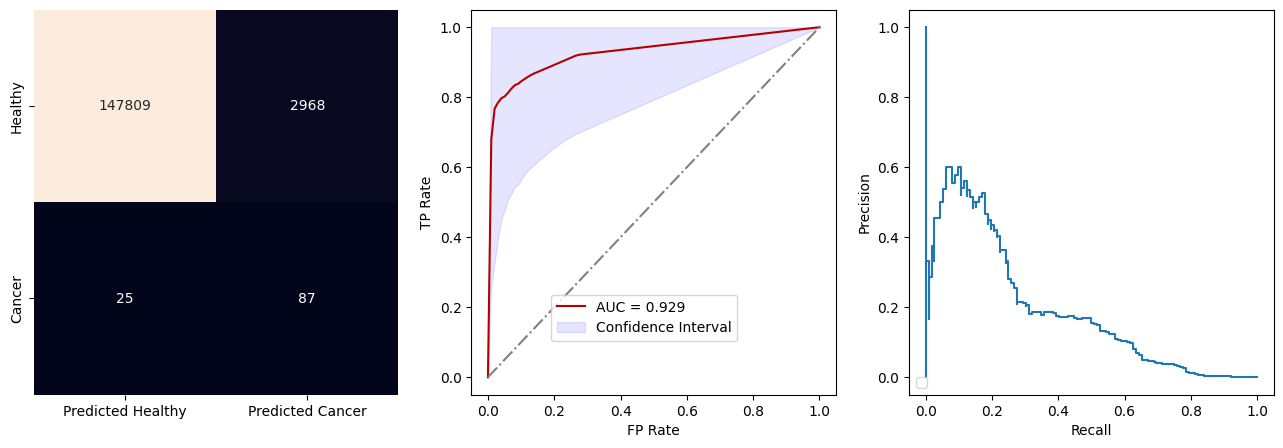

+---------------------------+---------+------------+------------+-------+-------+----------+------------+------------+
|                           |   count |       mean |        std |   min |   25% |      50% |        75% |        max |
|---------------------------+---------+------------+------------+-------+-------+----------+------------+------------|
| cancer_in_next_1_years_-6 |       8 | 0.00125    | 0.00172516 |     0 | 0     | 0        | 0.00333333 | 0.00333333 |
| cancer_in_next_1_years_-5 |      20 | 0.00583333 | 0.0191905  |     0 | 0     | 0        | 0          | 0.0833333  |
| cancer_in_next_1_years_-4 |      36 | 0.0143519  | 0.0428569  |     0 | 0     | 0        | 0.00666667 | 0.193333   |
| cancer_in_next_1_years_-3 |      51 | 0.0128105  | 0.0365293  |     0 | 0     | 0        | 0.00333333 | 0.206667   |
| cancer_in_next_1_years_-2 |      75 | 0.0249333  | 0.0749161  |     0 | 0     | 0        | 0.01       | 0.5        |
| cancer_in_next_1_years_-1 |     112 | 0.263929

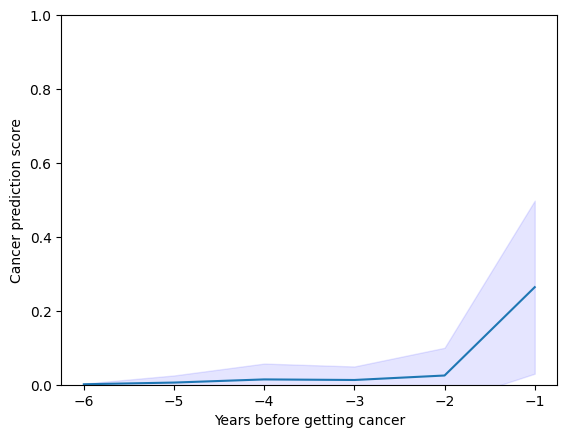

+---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------+
|                           |   count |       mean |       std |   min |   25% |   50% |        75% |      max |
|---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------|
| cancer_in_next_1_years_-6 |   20949 | 0.00392079 | 0.0178468 |     0 |     0 |     0 | 0.00333333 | 0.663333 |
| cancer_in_next_1_years_-5 |   22319 | 0.00388369 | 0.0174915 |     0 |     0 |     0 | 0.00333333 | 0.616667 |
| cancer_in_next_1_years_-4 |   25070 | 0.0038826  | 0.0164089 |     0 |     0 |     0 | 0.00333333 | 0.616667 |
| cancer_in_next_1_years_-3 |   26219 | 0.00450907 | 0.0195211 |     0 |     0 |     0 | 0.00333333 | 0.553333 |
| cancer_in_next_1_years_-2 |   24683 | 0.00376967 | 0.0196839 |     0 |     0 |     0 | 0          | 0.72     |
| cancer_in_next_1_years_-1 |   30552 | 0.00646537 | 0.0326551 |     0 |     0 |     0 | 0.00333

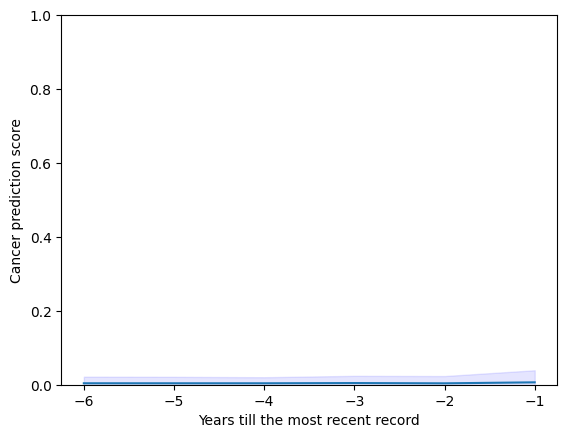

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 |  -0.0001    |             112 |           150777 |               0 |                0 | 0.000742267 | 1        |             1        |           1           |                nan |                nan |            nan           |
|  1 |   0.0206667 |              89 |             6139 

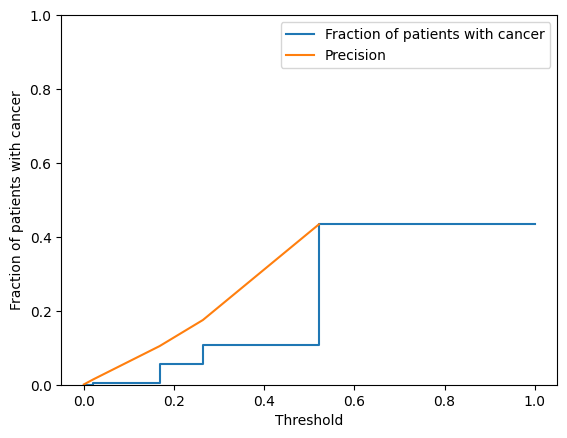



Cross-Validation measures:
+--------------------+----------+-------------+-----------+----------+
|                    |     mean |         std |       min |      max |
|--------------------+----------+-------------+-----------+----------|
| precision__class_0 | 0.999463 | 0.000163194 | 0.9993    | 0.999803 |
| recall__class_0    | 0.999436 | 0.000296079 | 0.998901  | 0.9998   |
| f1-score__class_0  | 0.999449 | 0.000161178 | 0.999101  | 0.999703 |
| precision__class_1 | 0.276072 | 0.136339    | 0.0833333 | 0.555556 |
| recall__class_1    | 0.278571 | 0.204585    | 0.125     | 0.75     |
| f1-score__class_1  | 0.264324 | 0.15347     | 0.1       | 0.625    |
| accuracy           | 0.998899 | 0.000321964 | 0.998203  | 0.999406 |
| auc                | 0.909743 | 0.0827138   | 0.74256   | 0.998757 |
+--------------------+----------+-------------+-----------+----------+
_for_experiment_participants_screened_single_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


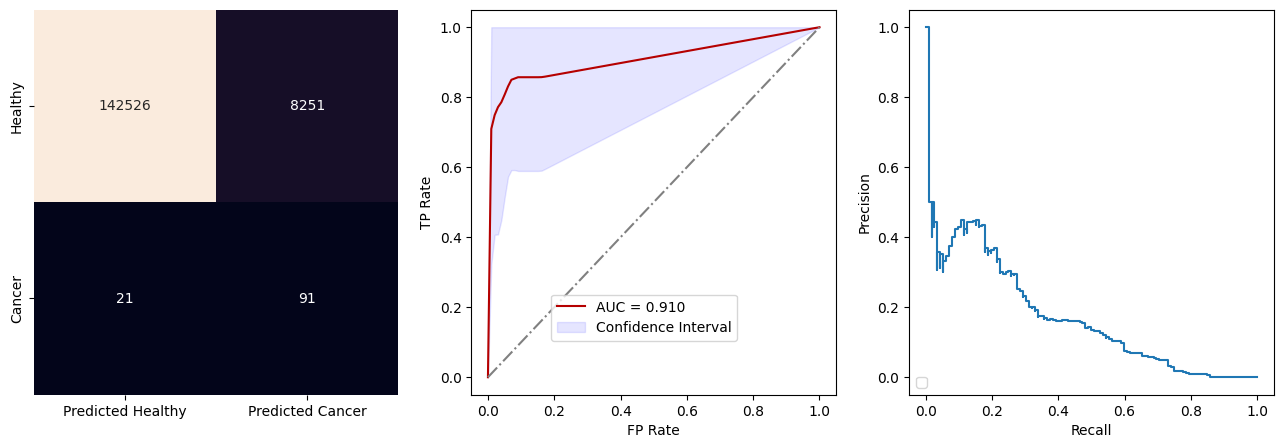

+---------------------------+---------+------------+------------+-------+-------+----------+-------------+------------+
|                           |   count |       mean |        std |   min |   25% |      50% |         75% |        max |
|---------------------------+---------+------------+------------+-------+-------+----------+-------------+------------|
| cancer_in_next_1_years_-6 |       8 | 0.00166667 | 0.00251976 |     0 | 0     | 0        | 0.00333333  | 0.00666667 |
| cancer_in_next_1_years_-5 |      20 | 0.006      | 0.0215645  |     0 | 0     | 0        | 0.000833333 | 0.0966667  |
| cancer_in_next_1_years_-4 |      36 | 0.00675926 | 0.0167614  |     0 | 0     | 0        | 0.00333333  | 0.07       |
| cancer_in_next_1_years_-3 |      51 | 0.00647059 | 0.022325   |     0 | 0     | 0        | 0.00333333  | 0.136667   |
| cancer_in_next_1_years_-2 |      75 | 0.0296444  | 0.105597   |     0 | 0     | 0        | 0.00333333  | 0.7        |
| cancer_in_next_1_years_-1 |     112 | 

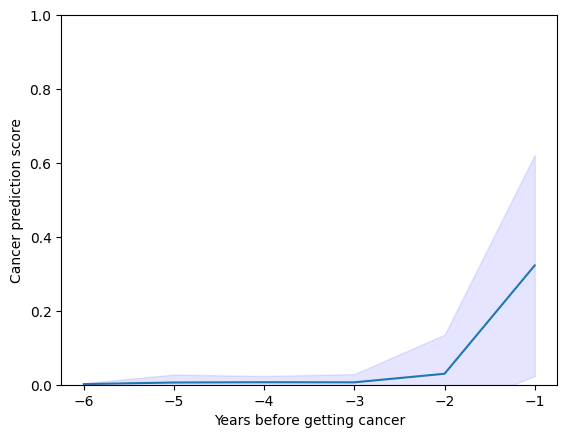

+---------------------------+---------+------------+-----------+-------+-------+-------+-------+----------+
|                           |   count |       mean |       std |   min |   25% |   50% |   75% |      max |
|---------------------------+---------+------------+-----------+-------+-------+-------+-------+----------|
| cancer_in_next_1_years_-6 |   20949 | 0.00320047 | 0.018107  |     0 |     0 |     0 |     0 | 0.89     |
| cancer_in_next_1_years_-5 |   22319 | 0.00324776 | 0.019428  |     0 |     0 |     0 |     0 | 0.673333 |
| cancer_in_next_1_years_-4 |   25070 | 0.00336112 | 0.0191332 |     0 |     0 |     0 |     0 | 0.836667 |
| cancer_in_next_1_years_-3 |   26219 | 0.00394561 | 0.0232974 |     0 |     0 |     0 |     0 | 0.78     |
| cancer_in_next_1_years_-2 |   24683 | 0.00319073 | 0.0240035 |     0 |     0 |     0 |     0 | 0.896667 |
| cancer_in_next_1_years_-1 |   30552 | 0.00619916 | 0.0409647 |     0 |     0 |     0 |     0 | 0.966667 |
+---------------------------

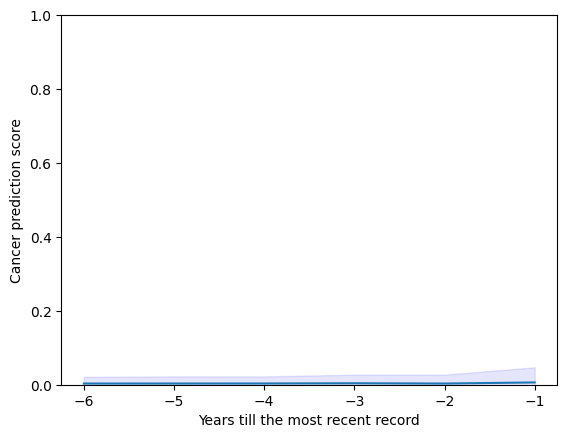

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 |   -0.0001   |             112 |           150777 |               0 |                0 | 0.000742267 | 1        |             1        |           1           |                nan |                nan |            nan           |
|  1 |    0.014    |              89 |             6974 

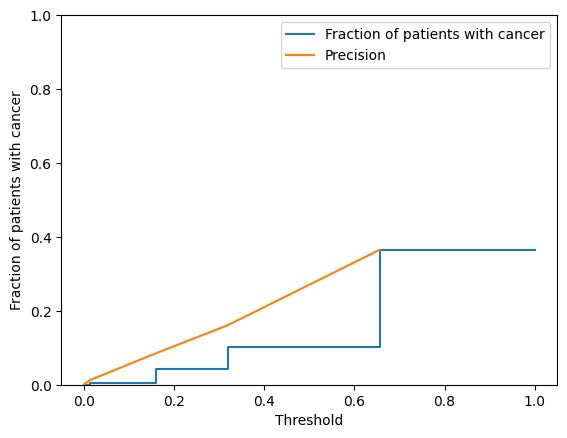

In [8]:
for filesuffix in filesuffixes_display:
    cv_analytics_util = cv_analytics_utils[filesuffix]
    # Store CV Results
    cv_analytics_util.store_cv_results()

    # Defining labels
    print(filesuffix)
    label = cv_analytics_util.get_label()
    classifier_name = cv_analytics_util.get_classifier_type()
    based_on = 'questionaire'
    if 'screened' in filesuffix:
        based_on += ' + screening'

    
    # Predicting actual cancer probability using bucketing
    per_thereshold_metrics = bucket_predictions_by_thresholds(cv_analytics_util)

    # General Plots
    threshold = cv_analytics_util.get_optimal_operating_point()
    # threshold = per_thereshold_metrics.loc[1, 'Threshold']
    # threshold = 0.02
    print(f"Threshold: {threshold}")
    cv_analytics_util.update_thresholds(threshold)
    cv_analytics_util.get_cv_report();
    # cv_analytics_util.store_cv_results()
    # cv_analytics_util.display_graph()
    display_graph_interval(cv_analytics_util)
    
    # Change in cancer probability over years
    full_dataset = cv_analytics_util.get_dataset_with_predictions()
    full_dataset_cancer = extract_full_dataset_filter_cancer(full_dataset)
    full_dataset_no_cancer = extract_full_dataset_filter_no_cancer(full_dataset)

    title_caner = f'Change in cancer prediction score for those who develop it based on {based_on} using {classifier_name} classifier'
    title_no_caner = f'Change in cancer prediction score for those who don\'t develop it based on {based_on} using {classifier_name} classifier'
    title_caner = f''
    title_no_caner = f''

    if label == 'cancer_in_next_1_years':
        plot_change_in_confidence(full_dataset_cancer, title=title_caner, label=label)
        plt.show()
        plot_change_in_confidence(full_dataset_no_cancer, title=title_no_caner, label=label, xlabel="Years till the most recent record")
        plt.show()

    # Predicting actual cancer probability using bucketing
    print_df(per_thereshold_metrics)
    title = f'Fraction of patients with cancer per bucket for those who develop it based on {based_on} using {classifier_name} classifier'
    plot_threhold_probabilities(per_thereshold_metrics, title=title)
    plt.show()
    per_thereshold_metrics.to_csv(f'./per_threshold_metrics/{filesuffix}.csv')

In [10]:
print_df(full_dataset_cancer)

+--------+------------+----------+----------+------------+----------------+-----------------+------------------------+--------------------------+----------+----------+---------+-----------------------------+-----------------------------+-------------+-----------+-----------+---------------+---------------------+-----------------+---------------------+---------------+--------------+---------------+-------------+--------------+--------------+---------------+----------------+----------------+----------------+--------------+--------------+---------------+---------------+-------------+-----------+-----------+------------+-----------+--------------+-----------+--------+----------------+--------------+--------------+------------+-------------------------------+-------------------------------+
|        | plco_id    |   bmi_20 |   bmi_50 |   bmi_curr |   ca125_result |   ca125ii_level |   ca125ii_level_binary |   cancer_in_next_1_years |   detl_p |   detr_p |   index |   is_ca125_screening_reco